# CARGANDO EL DATASET
* Importamos la librería para cargar la información previamente scrapeada de Maldita.es.
* 1224 noticias actualmente


In [15]:
import pickle

In [16]:
infile = open("Maldita_Dataset_02-07-2020",'rb')
dataset = pickle.load(infile)
len(dataset)

1224

# IMPORTING LIBRARIES
* Imports to preprocess the artcicles.

In [17]:
# -*- coding: utf-8 -*-
import re, string, unicodedata
import nltk
import codecs
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [18]:
#De los diccionarios de articulos ** me quedo solo con el contenido de x articulos del dataset y los introduzco en una lista
#de contenidos.
# **article = {"Title": title, "Publication_date": date, "Content": content, "URL": url, "Fuente": "Maldita.es"}
content_list = []
for a in dataset:
    content_list.append(a['Content'])

In [19]:
# This function "get_top_10_keywords" returns the top10 frequent words.
def get_top_10_keywords(words):
    """
    Return the top10 frequent words.
    :param list word: List containing all the words
    :return: ordered list with the top-10 most frequent words (in descending order)
    :rtype: list
    """
    counts = Counter(words)
    ordered_list = sorted(words, key=counts.get, reverse=True)
    unique_list = []
    
    #print(counts.most_common()[0:10])
    #print(type(counts.most_common()[0:10]))
    
    #10 most common
    most_com = counts.most_common()[0:10]
    
    return most_com
    
    #El codigo de abajo devuelve una lista de tuplas con el numero de repeticiones de cada valor
    #for ol in ordered_list:
    #    if ol not in unique_list:
    #        unique_list.append(ol)
    #return unique_list[:10]

# This function "show_top_10_keywords" prints the top 10 words:

def show_top_10_keywords(processed_articles):
    # Show the top-10 most frequent words
    for article_words in processed_articles:
        # Get te top-10 words
        top_10_words = get_top_10_keywords(article_words)
        
        print("\nTOP 10 words:")
        for el in top_10_words:
            print(el[0], ':', el[1])

# Preprocessing

* Convierte el texto a minúscula
* Elimina los caracteres que no sean ASCII
* Quita signos de puntuación
* Quita las stopwords
* Se realiza la Lemmatizacion de los tokens
* Extrae las 10 palabras más frecuentes de los artículos

In [20]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords_from_all_news(news, custom_stopwords):
    """
    Method to remove the stop words from a sentence.
    :param str sentence: List of all news
    :param list stopwords: List containing the stopwords to remove from the sentences
    :return: list of news with the stopwords removed
    :rtype: list
    """
    important_words_in_news=[]
    for one_news in news:
        new_words = []
        # Split the sentence into separate words
        words = word_tokenize(one_news)
        #print(words)
        
        for word in words:
        # Only keep the important words
            if word not in custom_stopwords:
                new_words.append(word)         
        important_words_in_news.append(new_words)
        
    return important_words_in_news

In [21]:
def nlp_articles(articles):
    """
    Preprocesamiento:
        * Perform some normalization:
            -Convierte el texto a minúscula
            -Elimina los caracteres que no sean ASCII
            -Quita signos de puntuación
            -Quita las stopwords
            -Se realiza la Lemmatizacion de los tokens
            -Extrae las 10 palabras más frecuentes de los artículos
            
    :param list articles: List containing all the news we will process
    :return: list of news tokenized into words
    :rtype: list
    """
    print("PREPROCESSING...")
    #print(articles)
    print('articles len', len(articles[0]))
    print('articles len', len(articles[1]))
    
    # Lowercase all the articles
    #print(articles)
    lower_articles = to_lowercase(articles)
    #print('new articles', lower_articles)
    #print(lower_articles)
    print('lower len', len(lower_articles[0]))
    print('lower len', len(lower_articles[1]))
    
    accent_articles = remove_non_ascii(lower_articles)
    print('accent_articles len', len(accent_articles[0]))
    print('accent_articles len', len(accent_articles[1]))
    
    #Remove the `` and '' and probably more useless stuff
    accent_articles2 = remove_punctuation(accent_articles)
    print('accent_articles2 len', len(accent_articles2[0]))
    print('accent_articles2 len', len(accent_articles2[1]))
    
    # Prepare our custom list of stopwords
    custom_stopwords = ["Noticia", "Noticias"]
    custom_stopwords += stopwords.words('spanish')
    
    # Add all the punctuation signs to the list of stopwords
    custom_stopwords += list(string.punctuation)
    
    # lowercase all the stopwords
    my_stopwords = to_lowercase(custom_stopwords)
    
    articles_no_stopwords = remove_stopwords_from_all_news(accent_articles2, my_stopwords)
    print('articles_no_stopwords len', len(articles_no_stopwords[0]))
    print('articles_no_stopwords len', len(articles_no_stopwords[1]))
    
    # Get the spanish lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_articles = []
    for article in articles_no_stopwords:
        article_words = []
        # The article contains all the words. Separate them
        for word in article:
            article_words.append(lemmatizer.lemmatize(word))
        # The next step expects a string. Let's concatenate the separate words using blanks.
        lemmatized_articles.append(article_words)
        
    return lemmatized_articles

# Obtengo las keywords
processed_articles = nlp_articles(content_list)

# Muestro las top-10 keywords
show_top_10_keywords(processed_articles)

PREPROCESSING...
articles len 3029
articles len 2196
lower len 3029
lower len 2196
accent_articles len 2979
accent_articles len 2167
accent_articles2 len 2901
accent_articles2 len 2110
articles_no_stopwords len 253
articles_no_stopwords len 173

TOP 10 words:
video : 8
puerto : 5
bulo : 5
si : 5
alarma : 4
coronavirus : 4
contamos : 4
redes : 4
ciudad : 4
grabado : 4

TOP 10 words:
correos : 9
investigacion : 4
mascarillas : 3
covid19 : 3
clientes : 3
compra : 3
recaudado : 3
publico : 3
dinero : 2
proteccion : 2

TOP 10 words:
web : 14
whatsapp : 10
tarjetas : 9
ma : 8
cadena : 8
tarjeta : 8
datos : 7
contamos : 7
mensaje : 7
phishing : 7

TOP 10 words:
rodriguez : 5
sido : 4
despedido : 4
audio : 4
carlos : 3
onda : 3
cero : 3
si : 3
programa : 3
cierto : 3

TOP 10 words:
datos : 43
phishing : 42
ma : 35
tecnica : 28
trata : 28
hacerse : 25
caso : 25
bulo : 21
habeis : 17
enlace : 16

TOP 10 words:
hospital : 3
2017 : 2
crisis : 1
coronavirus : 1
vuelve : 1
bulo : 1
viejo : 1
foto : 

mocion : 3
abril : 3
estan : 3
pasar : 3
periodico : 3

TOP 10 words:
cuenta : 4
mayo : 3
tuit : 3
viralizado : 2
asegura : 2
casado : 2
abascal : 2
mocion : 2
censura : 2
13 : 2

TOP 10 words:
contenido : 3
iglesias : 2
montero : 2
comprado : 2
apartamento : 2
benidorm : 2
bulo : 2
publicado : 2
web : 2
estais : 1

TOP 10 words:
tuit : 6
perfil : 4
alfonso : 3
merlos : 3
cuenta : 3
oficial : 3
a_merlos13tv : 3
habeis : 2
consultado : 2
presentador : 2

TOP 10 words:
audio : 26
coronavirus : 17
whatsapp : 10
ma : 8
contamos : 8
aqui : 7
tambien : 7
marzo : 7
madrid : 7
hospital : 6

TOP 10 words:
casado : 3
captura : 2
pablo : 2
ningun : 2
coincidiendo : 1
pandemia : 1
covid19 : 1
vuelto : 1
viralizar : 1
atribuye : 1

TOP 10 words:
captura : 3
tuit : 3
jeanine : 3
anez : 3
publicado : 2
presidenta : 2
interina : 2
bolivia : 2
habra : 2
elecciones : 2

TOP 10 words:
parlamento : 4
video : 2
identificacion : 2
imagenes : 2
ucrania : 2
votar : 2
practica : 2
coincidiendo : 1
alarma : 1
d

vera : 3
ningun : 3
circula : 2
tenerife : 2
bulo : 2
supermercado : 2

TOP 10 words:
sorteo : 3
publicacion : 2
mercadona : 2
falso : 2
habeis : 1
preguntado : 1
si : 1
cierto : 1
facebook : 1
cuenta : 1

TOP 10 words:
gomez : 5
jose : 4
bono : 4
aitor : 3
asegura : 2
ninguna : 2
habria : 2
comision : 2
compra : 2
test : 2

TOP 10 words:
a3 : 6
controles : 5
madrid : 4
municipal : 4
video : 3
retenciones : 3
establecido : 3
policia : 3
malditaes : 3
estan : 2

TOP 10 words:
a3 : 9
controles : 7
video : 5
salida : 5
madrid : 5
trafico : 5
estan : 4
retenciones : 4
segun : 4
dgt : 4

TOP 10 words:
sistema : 6
makaroff : 4
cerebro : 4
ensenaran : 3
mente : 3
controlar : 3
inmunologico : 3
celulas : 3
enfermedades : 3
sierra : 3

TOP 10 words:
homeopatia : 5
principe : 4
carlos : 3
curado : 3
contenido : 3
servicio : 3
nacional : 3
covid19 : 2
medicamentos : 2
homeopaticos : 2

TOP 10 words:
coronavirus : 3
afirma : 2
francisco : 2
paco : 2
perez : 2
medico : 2
hospital : 2
paz : 2
bulo :

rumores : 3
origen : 3
pruebas : 3
lagarde : 3
contenido : 2
kit : 2
radio : 2

TOP 10 words:
caixabank : 5
correo : 4
cuenta : 4
acceso : 4
electronico : 3
enviado : 3
entidad : 3
motivo : 3
trata : 3
phishing : 3

TOP 10 words:
iberdrola : 3
descuento : 3
clientes : 3
mercado : 3
si : 2
whatsapp : 2
dice : 2
promocion : 2
explicado : 2
colectivo : 2

TOP 10 words:
residencias : 17
fallecidos : 15
total : 13
marzo : 12
ancianos : 12
coronavirus : 10
datos : 8
muertes : 7
persona : 7
muertos : 6

TOP 10 words:
the : 40
that : 25
in : 19
of : 16
to : 11
and : 10
are : 8
it : 7
patient : 7
is : 7

TOP 10 words:
hospital : 5
paz : 4
madrid : 4
manta : 4
estan : 4
pacientes : 3
material : 3
comunidad : 3
asegura : 2
universitario : 2

TOP 10 words:
despacho : 2
abogados : 2
rodriguez : 1
hermosilla : 1
recogiendo : 1
firmas : 1
iniciativa : 1
legislativa : 1
popular : 1
diputados : 1

TOP 10 words:
genomica : 16
gobierno : 14
hospitales : 11
test : 9
kit : 8
estan : 8
coronavirus : 6
cospe

junta : 3
cuatro : 3
permitida : 3

TOP 10 words:
valladolid : 9
parques : 8
dia : 6
estan : 5
coronavirus : 5
ayuntamiento : 5
fumigando : 4
adra : 4
malditaes : 4
ciudad : 4

TOP 10 words:
casa : 6
medidas : 5
fundacion : 4
persona : 4
zapatos : 4
espana : 3
documento : 3
voluntarios : 3
salvamento : 3
bolivia : 3

TOP 10 words:
captura : 6
almeria : 6
busca : 5
hospital : 4
tras : 4
dar : 4
positivo : 4
coronavirus : 4
foto : 3
haberse : 3

TOP 10 words:
fibrosis : 7
si : 6
video : 5
infeccion : 4
coronavirus : 4
persona : 4
manuel : 3
elkin : 3
pulmones : 3
bulo : 3

TOP 10 words:
colaboracion : 4
hospital : 3
confeccionar : 3
hecho : 3
llamamiento : 3
imagen : 2
virgen : 2
arrixaca : 2
mascarillas : 2
bulo : 2

TOP 10 words:
marzo : 6
parques : 4
adra : 4
veterinaria : 4
ayuntamiento : 4
coronavirus : 3
mensaje : 3
persona : 3
parque : 3
intoxicacion : 3

TOP 10 words:
mascarillas : 23
sanidad : 10
ministerio : 9
empresa : 9
material : 8
sanitario : 8
marzo : 8
compra : 8
guardia 

persona : 3
circulando : 2
contexto : 2
aparece : 2
china : 2
trata : 2
web : 2
bromas : 2

TOP 10 words:
castilla : 8
leon : 7
marzo : 4
suspension : 4
comunicado : 4
montaje : 4
junta : 3
12 : 3
consejeria : 3
clases : 3

TOP 10 words:
coronavirus : 9
vacuna : 6
brote : 6
bovino : 5
nuevo : 4
virus : 3
hace : 3
siglos : 3
rotaviruscoronavirus : 3
bulo : 3

TOP 10 words:
cuenta : 7
twitter : 4
valentivaliente : 4
tuit : 3
feminista : 3
pene : 3
simbolo : 3
extremum : 3
derecha : 3
bulo : 3

TOP 10 words:
twitter : 7
tuits : 7
cuenta : 7
machista : 5
feminista : 4
mortadela : 4
tambien : 4
feminismo : 3
bulo : 3
ajedrez : 3

TOP 10 words:
violacion : 4
inversa : 4
cuentas : 4
cuenta : 3
troll : 3
feminismo : 3
feministas : 2
contenido : 2
rechazar : 2
tener : 2

TOP 10 words:
situaciones : 4
si : 4
bulos : 3
ma : 3
situacion : 3
tambien : 3
solo : 3
asi : 2
contenido : 2
importante : 2

TOP 10 words:
tarta : 9
bebe : 9
facebook : 5
do : 5
2011 : 5
publicacion : 4
tartas : 4
imagenes : 

sm : 4
enlace : 3
web : 3
logo : 3
datos : 3
bancarios : 3
mensaje : 2
paquete : 2

TOP 10 words:
cadena : 7
resolucion : 7
parlamento : 6
europeo : 6
miembros : 5
comunismo : 4
estalinismo : 4
ademas : 4
europea : 4
vinculante : 4

TOP 10 words:
ensenanza : 11
privados : 10
colegios : 9
basica : 9
ministerio : 7
finlandia : 6
educacion : 5
segun : 5
centros : 5
si : 4

TOP 10 words:
policia : 6
nacional : 6
ma : 3
bulo : 3
espana : 3
alerta : 3
robar : 3
desmintio : 3
twitter : 3
manos : 2

TOP 10 words:
curie : 8
marie : 4
museo : 4
frase : 3
inferior : 3
cita : 3
cientifica : 2
nunca : 2
creido : 2
ser : 2

TOP 10 words:
bitcoin : 5
timo : 3
jordi : 3
cruz : 3
trader : 3
trave : 3
habian : 3
falsas : 2
utilizar : 2
caras : 2

TOP 10 words:
mensaje : 3
dice : 2
noche : 2
0030 : 2
0330 : 2
apagar : 2
movil : 2
radiacion : 2
rayos : 2
cosmicos : 2

TOP 10 words:
guardia : 6
victima : 6
verificacion : 5
civil : 4
trave : 4
posible : 4
aplicacion : 4
mensaje : 4
codigo : 4
sm : 4

TOP 10

imagenes : 7
mujer : 4
momento : 4
video : 4
inmigrantes : 3
real : 3
ademas : 3
espana : 3

TOP 10 words:
video : 9
accidente : 9
helicoptero : 6
imagenes : 4
montana : 4
si : 3
momento : 3
bryant : 3
eau : 3
2018 : 3

TOP 10 words:
video : 9
campana : 3
madres : 2
hijos : 2
contexto : 2
ambientar : 2
agregados : 2
recientemente : 2
afp : 2
parodia : 2

TOP 10 words:
phishing : 3
mediamarkt : 2
facebook : 2
paquetes : 2
empresa : 2
trata : 2
datos : 2
tambien : 2
caso : 2
puedes : 2

TOP 10 words:
cuenta : 4
parental : 3
podemos : 3
pin : 2
tuits : 2
twitter : 2
rosadozuruta : 2
miguel : 2
rosado : 2
zuruta : 2

TOP 10 words:
video : 9
persona : 7
atun : 5
ministerio : 5
marruecos : 5
ve : 4
desfavorecidas : 4
programa : 3
2017 : 3
agricultura : 3

TOP 10 words:
video : 8
alerta : 5
tambien : 5
mensaje : 4
ninguna : 4
segun : 4
oficiales : 4
israel : 4
producto : 4
in : 4

TOP 10 words:
video : 9
accidente : 9
helicoptero : 6
imagenes : 4
montana : 4
si : 3
momento : 3
bryant : 3
eau 

si : 2
relacionado : 2
producido : 2
aunque : 2
imagenes : 2
actuales : 2

TOP 10 words:
is : 5
the : 5
to : 5
and : 5
photoshop : 4
this : 4
koala : 3
montaje : 3
autora : 3
publicacion : 3

TOP 10 words:
captura : 2
tras : 1
investidura : 1
pedro : 1
sanchez : 1
presidente : 1
gobierno : 1
vuelve : 1
circular : 1
supuesto : 1

TOP 10 words:
video : 16
tabaco : 13
centro : 12
comercial : 9
bulo : 8
enero : 8
grabado : 8
licitacion : 7
persona : 7
hombre : 7

TOP 10 words:
abascal : 6
santiago : 4
escuza : 4
partido : 3
pp : 3
captura : 2
papeles : 2
barcenas : 2
popular : 2
millones : 2

TOP 10 words:
cuenta : 3
apple : 3
oficial : 3
preguntado : 2
varias : 2
veces : 2
appleescompany : 2
10000 : 2
airpods : 2
iphones : 2

TOP 10 words:
coca : 6
cola : 6
web : 5
whatsapp : 4
sorteo : 4
cadena : 3
ver : 3
iphone : 3
trave : 2
si : 2

TOP 10 words:
dia : 14
laboral : 9
horas : 8
finlandia : 7
4 : 7
semana : 6
marin : 6
jornada : 5
6 : 5
agosto : 5

TOP 10 words:
bitcoin : 6
programa : 5


oficial : 4

TOP 10 words:
presupuestos : 6
sanchez : 5
cataluna : 4
guardia : 4
civil : 4
policia : 4
nacional : 4
mensaje : 4
2018 : 4
gobierno : 4

TOP 10 words:
mercadona : 5
mensaje : 3
compania : 3
web : 3
whatsapp : 2
cupon : 2
phishing : 2
tecnica : 2
hacerse : 2
datos : 2

TOP 10 words:
nino : 4
bulo : 4
policia : 3
connecticut : 3
circulando : 3
menor : 3
is : 3
the : 3
fotografia : 2
junto : 2

TOP 10 words:
embargo : 5
alvarez : 4
difunde : 3
contenido : 3
ere : 3
magdalena : 3
actual : 2
jueza : 2
cinco : 2
cuentas : 2

TOP 10 words:
bulo : 3
2018 : 3
calle : 3
larios : 3
diciembre : 2
asociacion : 2
malaga : 2
navidena : 2
ano : 2
alumbrado : 2

TOP 10 words:
oferta : 13
trabajo : 6
falsa : 5
facebook : 4
carrefour : 4
habeis : 3
ver : 3
ma : 3
empresa : 3
pagina : 3

TOP 10 words:
telefono : 4
cachorros : 3
bulo : 3
difunde : 3
numero : 3
espana : 3
mensaje : 3
fotografia : 2
9 : 2
junto : 2

TOP 10 words:
vacuna : 9
si : 9
euro : 7
comunidades : 7
vacunas : 7
106 : 5
au

negro : 3

TOP 10 words:
ordenador : 6
imagen : 5
5g : 5
carpeta : 4
red : 4
window : 4
system : 3
32 : 3
espana : 3
sistema : 3

TOP 10 words:
cafe : 4
coronavirus : 4
tomar : 3
cadena : 2
dr : 2
li : 2
habria : 2
prevenir : 2
contagio : 2
dicha : 2

TOP 10 words:
portada : 7
folha : 7
periodico : 6
bolsonaro : 5
23 : 4
mayo : 4
presidente : 4
brasil : 4
brasileno : 3
sao : 3

TOP 10 words:
podemos : 6
tuit : 3
ninguna : 3
aseguran : 2
propuesto : 2
poner : 2
tope : 2
edad : 2
cuenta : 2
proponga : 2

TOP 10 words:
ciudad : 8
real : 8
video : 5
mujer : 5
manifestacion : 5
enfermera : 5
policia : 5
castillala : 4
mancha : 4
personal : 3

TOP 10 words:
estatua : 4
frente : 4
escultura : 4
granada : 3
imagen : 3
2018 : 3
acto : 3
redes : 2
federico : 2
garcia : 2


In [22]:
processed_articles

[['alarma',
  'coronavirus',
  'circulado',
  'fotos',
  'video',
  'animales',
  'campando',
  'anchas',
  'varias',
  'ciudades',
  'ciervos',
  'delfines',
  'flamenco',
  'supuestamente',
  'ocupado',
  'espacio',
  'humanos',
  'dejado',
  'confinamiento',
  'embargo',
  'aunque',
  'imagenes',
  'tipo',
  'podido',
  'ver',
  'semanas',
  'habeis',
  'preguntado',
  'tomado',
  'crisis',
  'coronavirus',
  'montaje',
  'contamos',
  'ejemplosesta',
  'circulando',
  'video',
  'redes',
  'sociales',
  'aparecen',
  'delfines',
  'nadando',
  'puerto',
  'deportivo',
  'supuestamente',
  'debido',
  'inactividad',
  'puerto',
  'provocada',
  'crisis',
  'sanitarium',
  'coronavirus',
  'video',
  'movido',
  'diciendo',
  'trata',
  'paseo',
  'maritimo',
  'palma',
  'mallorca',
  'puerto',
  'denia',
  'alicante',
  'moraira',
  'alicante',
  'premia',
  'mar',
  'barcelona',
  'bulo',
  'imagenes',
  'grabadas',
  'puerto',
  'deportivo',
  'atakoy',
  'ciudad',
  'estambul',


In [23]:
#TfidfVectorizer will L-2 normalize the output matrix by default, as a final step of the calculation. Having it normalized means it will have only weights between 0 and 1.

vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x, norm='l2')
tfidf_matrix = vectorizer.fit_transform(processed_articles)

#TfidfVectorizer ---> Equivalent to CountVectorizer followed by TfidfTransformer.
#idfs are calculated by TfidfTransformer's fit()
#tfidfs are calculated by TfidfTransformer's transform()
#tfs are calculated by CountVectorizer's fit_transform()

matrix_vocab = vectorizer.get_feature_names()
matrix = tfidf_matrix.todense()
matrix_idf = vectorizer.idf_
print(tfidf_matrix.shape)
#print(matrix_vocab)
print(matrix)

#Posicion numero 36 -> 35 en la lista "Barcelona" aparece en ambos vectores de tf idf. La palabra aparece en los 2 documentos. En el primero 2 veces y en el 2º 1 vez.

(1224, 29361)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
print(matrix.shape)
print('video - 8:', matrix_vocab.index("video"))
print('correos - 9:', matrix_vocab.index("correos"))

#Por que bulo tiene menos valor de tf idf si sale las mismas veces en 1 mismo doc y sale 1 vez en el 2º doc mientras que puerto no sale en el 2 doc
puerto = matrix_vocab.index("puerto")
bulo = matrix_vocab.index("bulo")

(1224, 29361)
video - 8: 28607
correos - 9: 7918


In [25]:
A = np.asarray(matrix[0]).reshape(-1)
print(A[puerto])
print(A[bulo])

0.3118970714801201
0.08731370183517365


### CLUSTERING SECTION

* Clusterización empleando MiniBatchKMeans puesto que su ejecución es mas rápida y los resultados son muy similares al Kmeans.
* Método del codo -> Buscamos el número óptimo de clusters en base al SSE. Nos quedamos con el número de clusters más óptimo y más visual para el análisis.
* Dibujamos los clusters en base al PCA y al TSNE.
* Mostramos el top keywords de cada cluster.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

sum of squared errors (SSE) - SSE is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


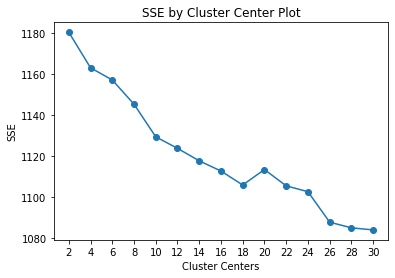

In [27]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_matrix, 30)

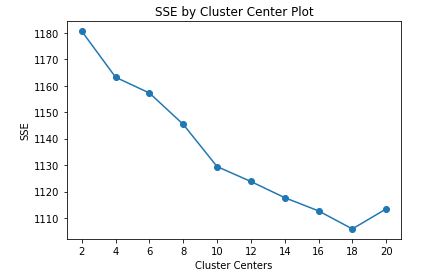

In [28]:
from IPython.display import Image
Image(filename='elbow1.png') 

In [29]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

PCA = análisis de componentes principales : De lo visto es fácilmente deducible que una de las posibles aplicaciones de un algoritmo de reducción de dimensionalidad como PCA es la visualización en 2 o 3 dimensiones de conjuntos de datos de un mayor número de dimensiones


TSNE = t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

https://www.interactivechaos.com/manual/tutorial-de-machine-learning/t-sne

t-SNE (T-distributed Stochastic Neighbor Embedding) es un algoritmo diseñado para la visualización de conjuntos de datos de alta dimensionalidad. Si el número de dimensiones es muy alto, Scikit-Learn recomienda en su documentación utilizar un método de reducción de dimensionalidad previo (como PCA) para reducir el conjunto de datos a un número de dimensiones razonable (por ejemplo 50), lo que reducirá el ruido y aligerará la ejecución de t-SNE.

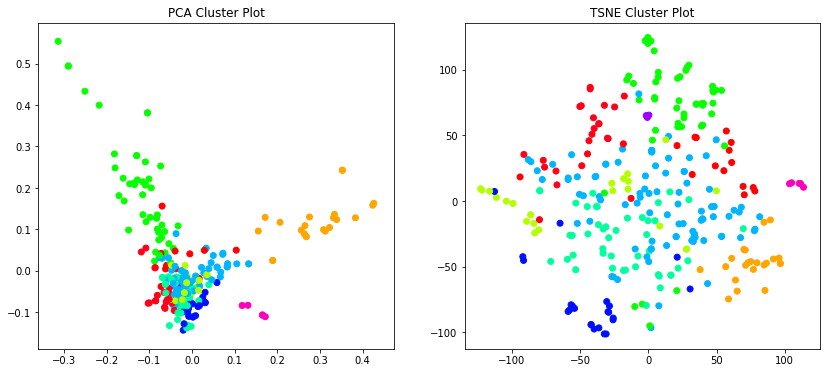

In [35]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=True)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_matrix, clusters)

In [31]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, matrix_vocab, 10)


Cluster 0
medico,mensajes,mensaje,respiradores,madrid,coronavirus,pacientes,whatsapp,audio,hospital

Cluster 1
correos,empresa,pagina,sm,puedes,web,sorteo,enlace,datos,phishing

Cluster 2
euro,imagen,violencia,hombre,persona,menores,ma,padre,ayudas,ano

Cluster 3
ma,cepa,salud,nuevo,oms,covid19,china,brote,virus,coronavirus

Cluster 4
web,presidente,imagen,pedro,podemos,sanchez,gobierno,contenido,pablo,iglesias

Cluster 5
persona,madrid,cadena,imagen,contenido,ministerio,coronavirus,si,marzo,policia

Cluster 6
supuesto,loterias,feminista,cuentas,captura,twitter,tuits,publicado,cuenta,tuit

Cluster 7
pensamos,alertaremos,resolveremos,contradiga,echaremos,poneroslo,contaremos,hora,semana,maldita

Cluster 8
dinero,trader,falsas,inversion,timarte,intentar,programa,hormiguero,timo,bitcoin

Cluster 9
si,the,2019,puede,ver,persona,ve,grabado,imagenes,video


Debo quitar palabra como The, ma , sm en las stopwords ya que es ruido? o lo tengo que dejar para ver que también hay ciertos "errores"